# 16. 여러 그래프 배치하기
---
### 서브플롯 (Subplots)
- 하나의 Figure에 여러 개의 그래프를 배치할 수 있다.
- 다양한 관점에서 데이터를 동시에 비교할 수 있다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 15 # 폰트 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


## 데이터 준비
### 고객 데이터 불러오기


In [4]:
# 고객 데이터 불러오기
df = pd.read_csv('../02_Pandas-main/data/customers3.csv', encoding='utf-8')
df.head()


,고객ID,고객명,나이,거주도시,주요관심사,최근1년_방문빈도,평균구매액(만원),고객만족도(점),재구매의사(점)
0,C001,박태근,35,시흥,Electronics,75,70,78,92
1,C002,이영희,30,안양,fashion,85,92,88,85
2,C003,박지성,35,울산,NaN,95,110,91,88
3,C004,최민아,40,창원,Fashion,92,105,82,96
4,C005,정수빈,28,구로,Fashion,82,88,94,79


## 서브플롯 만들기
### subplots() 함수
- **subplots(nrows, ncols)** 로 여러 그래프를 배치할 수 있다.
- **fig**: Figure 객체
- **axs**: Axes 객체들의 배열


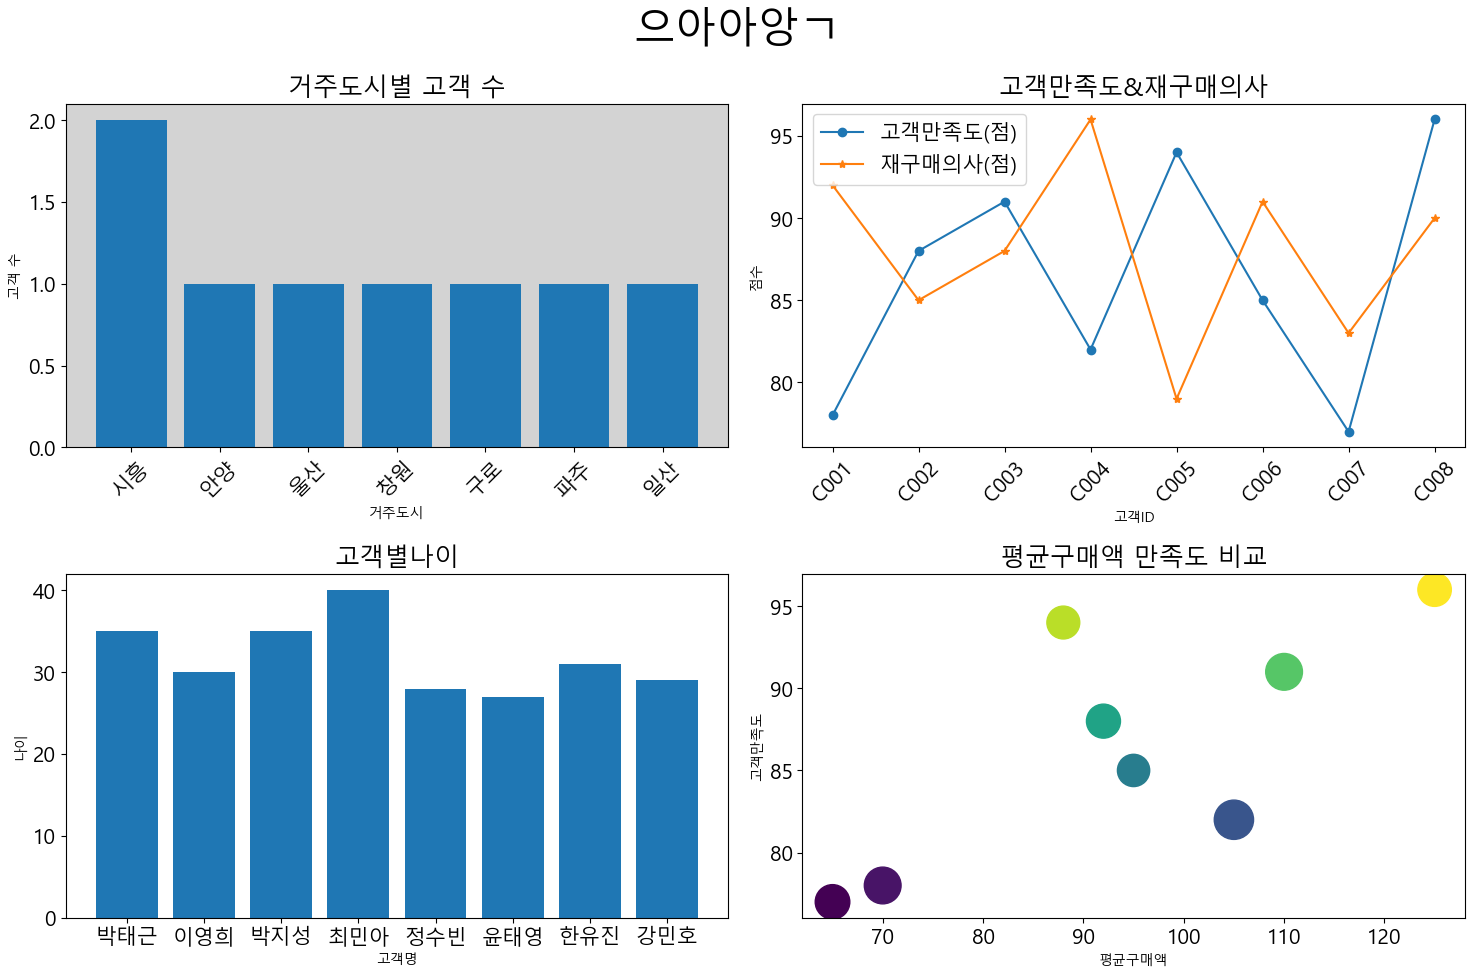

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

fig.suptitle('으아아앙ㄱ', fontsize=30)

# 첫번쨰그래프(0,0) 거주도시별 고객 수
city_counts = df['거주도시'].value_counts() #거주도시별 고객 수
axs[0,0].bar(city_counts.index, city_counts.values)
axs[0,0].set_title('거주도시별 고객 수')
axs[0,0].set_xlabel('거주도시',fontsize=10)
axs[0,0].set_ylabel('고객 수',fontsize=10)
axs[0,0].tick_params(axis='x',rotation=45)
axs[0,0].set_facecolor('lightgray') #색상


# 두번쨰그래프(0,1) 고객만족도와 재구매의사
axs[0,1].plot(df['고객ID'],df['고객만족도(점)'],label='고객만족도(점)',marker='o')
axs[0,1].plot(df['고객ID'],df['재구매의사(점)'],label='재구매의사(점)',marker='*')
axs[0,1].set_title('고객만족도&재구매의사')
axs[0,1].set_xlabel('고객ID',fontsize=10)
axs[0,1].set_ylabel('점수',fontsize=10)
axs[0,1].legend()
axs[0,1].tick_params(axis='x',rotation=45)

#세번쨰그래프(0,1) 고객만족도와 재구매의사
axs[1,0].bar(df['고객명'],df['나이'])
axs[1,0].set_title('고객별나이')
axs[1,0].set_xlabel('고객명',fontsize=10)
axs[1,0].set_ylabel('나이',fontsize=10)

#네번쨰그래프(0,1) 고객만족도와 재구매의사
axs[1,1].scatter(df['평균구매액(만원)'],df['고객만족도(점)'],s=df['나이']*20, c=df['고객만족도(점)'])
axs[1,1].set_title('평균구매액 만족도 비교')
axs[1,1].set_xlabel('평균구매액',fontsize=10)
axs[1,1].set_ylabel('고객만족도',fontsize=10)


plt.tight_layout() #그래프들 안겹치게...
plt.show()

## Axes 객체 활용
### 각 서브플롯 스타일링
- 각 Axes 객체에 대해 개별적으로 스타일을 적용할 수 있다.
- **set_facecolor()**: 배경색 설정
- **grid()**: 그리드 추가
